In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Diabetes = pd.read_csv('C:/Users/EJ/Documents/Rikar/diabetes.csv')

In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Diabetes.shape

(768, 9)

In [6]:
Diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

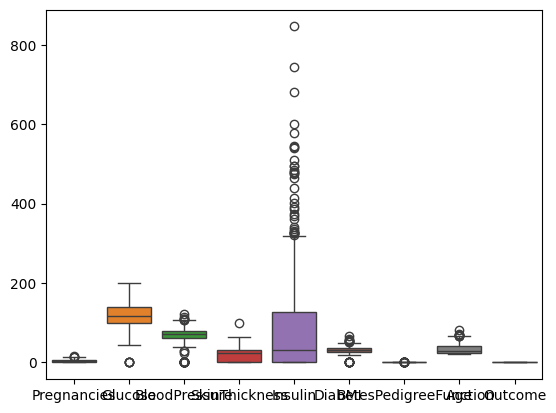

In [12]:
sns.boxplot(data=Diabetes)
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(Diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [22]:
X = Diabetes.drop('Outcome', axis=1)
y = Diabetes['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.693333       0.466667       0.583333  0.000000  0.511628   
1       0.076923  0.273333       0.366667       0.483333  0.000000  0.279070   
2       0.615385  0.926667       0.333333       0.000000  0.000000  0.169435   
3       0.076923  0.300000       0.366667       0.383333  0.313333  0.328904   
5       0.384615  0.480000       0.500000       0.000000  0.000000  0.245847   
..           ...       ...            ...            ...       ...       ...   
763     0.769231  0.380000       0.533333       0.800000  0.600000  0.488372   
764     0.153846  0.520000       0.433333       0.450000  0.000000  0.617940   
765     0.384615  0.513333       0.466667       0.383333  0.373333  0.265781   
766     0.076923  0.546667       0.266667       0.000000  0.000000  0.395349   
767     0.076923  0.326667       0.433333       0.516667  0.000000  0.405316   

     DiabetesPedigreeFunction       Age

In [25]:
print(y)

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 604, dtype: int64


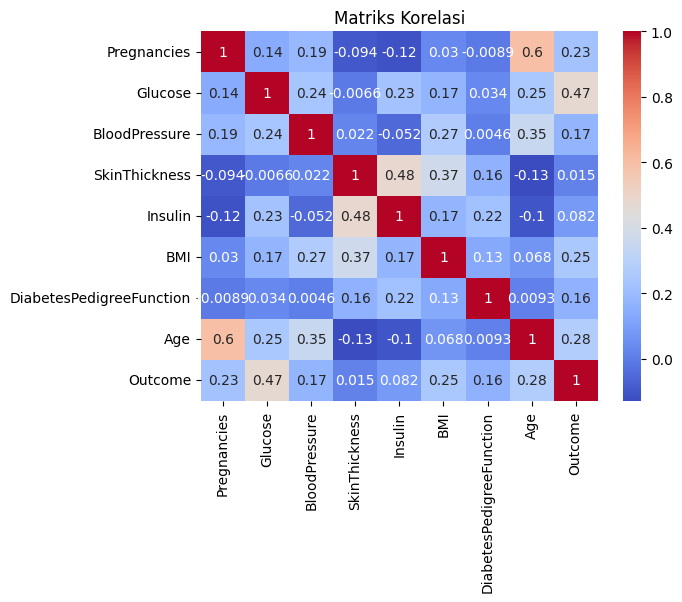

In [26]:
correlation_matrix = Diabetes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriks Korelasi")
plt.show()

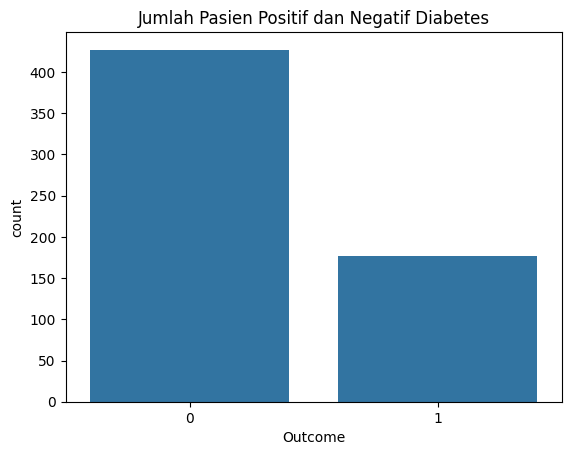

In [27]:
sns.countplot(x='Outcome', data=Diabetes)
plt.title('Jumlah Pasien Positif dan Negatif Diabetes')
plt.show()

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.4f}')

Akurasi: 0.8182


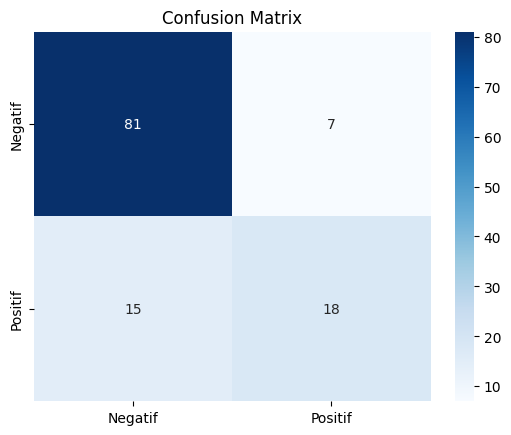

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.title("Confusion Matrix")
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        88
           1       0.72      0.55      0.62        33

    accuracy                           0.82       121
   macro avg       0.78      0.73      0.75       121
weighted avg       0.81      0.82      0.81       121



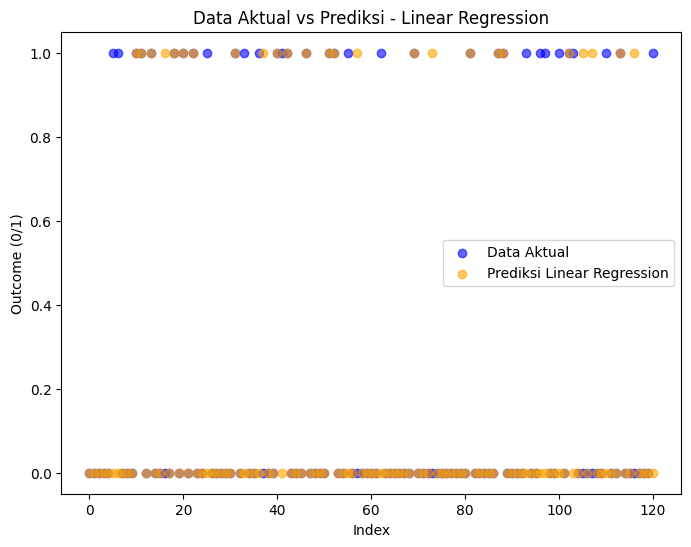

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Data Aktual", alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color="orange", label="Prediksi Linear Regression", alpha=0.6)
plt.title("Data Aktual vs Prediksi - Linear Regression")
plt.xlabel("Index")
plt.ylabel("Outcome (0/1)")
plt.legend()
plt.show()

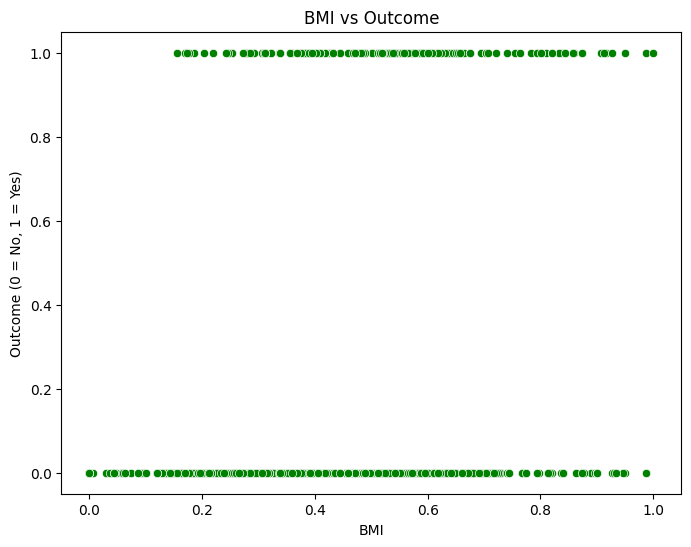

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Diabetes['BMI'], y=Diabetes['Outcome'], color='green')
plt.title('BMI vs Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome (0 = No, 1 = Yes)')
plt.show()

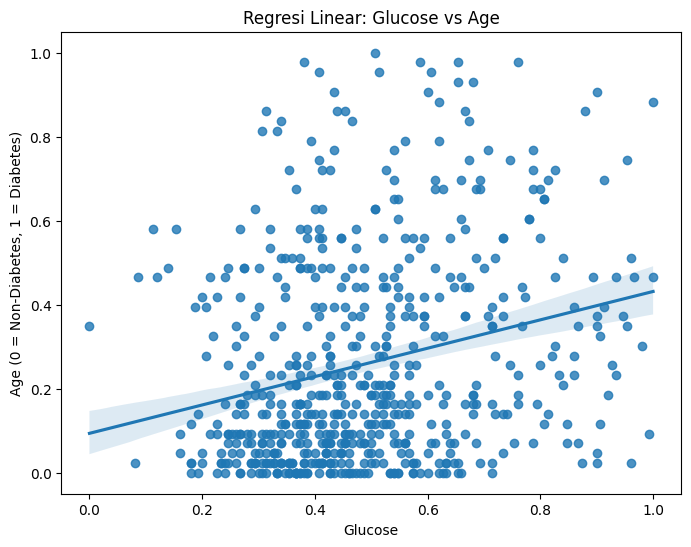

In [36]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=Diabetes["Glucose"], 
    y=Diabetes["Age"], 
    
)
plt.title("Regresi Linear: Glucose vs Age")
plt.xlabel("Glucose")
plt.ylabel("Age (0 = Non-Diabetes, 1 = Diabetes)")
plt.show()

In [37]:
import joblib

joblib.dump(model, 'diabetes_linear_regression_model.pkl')

['diabetes_linear_regression_model.pkl']

In [38]:
print(f'Koefisien model: {model.coef_}')

Koefisien model: [ 0.23123221  1.07686566 -0.07173931 -0.04664749 -0.09834951  0.35228243
  0.24395396  0.16492444]


In [40]:
positive = Diabetes[Diabetes['Outcome'] == 1]
negative = Diabetes[Diabetes['Outcome'] == 0]

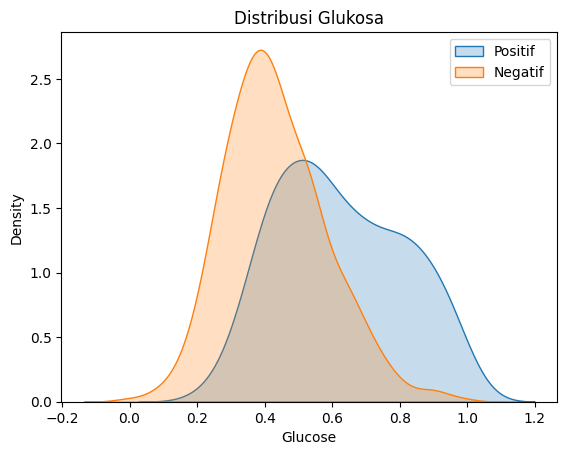

In [42]:
sns.kdeplot(positive['Glucose'], label='Positif', fill=True)
sns.kdeplot(negative['Glucose'], label='Negatif', fill=True)
plt.title('Distribusi Glukosa')
plt.legend()
plt.show()

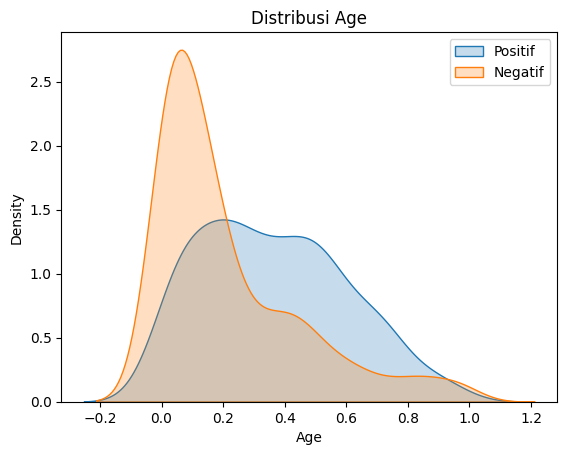

In [43]:
sns.kdeplot(positive['Age'], label='Positif', fill=True)
sns.kdeplot(negative['Age'], label='Negatif', fill=True)
plt.title('Distribusi Age')
plt.legend()
plt.show()

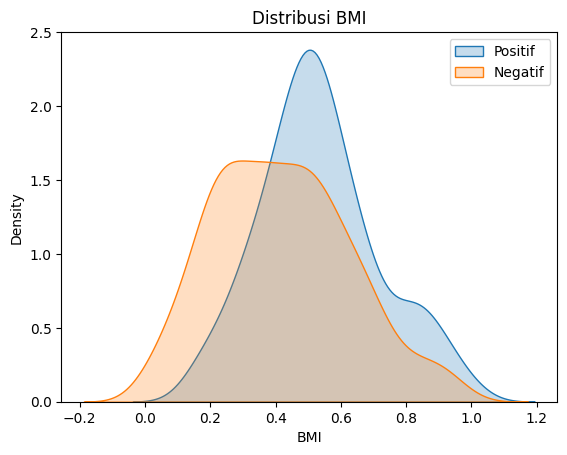

In [44]:
sns.kdeplot(positive['BMI'], label='Positif', fill=True)
sns.kdeplot(negative['BMI'], label='Negatif', fill=True)
plt.title('Distribusi BMI')
plt.legend()
plt.show()

In [45]:
print(f'Intercept model: {model.intercept_}')

Intercept model: -0.5089960396646631
